<a href="https://colab.research.google.com/github/rusamentiaga/CoronaDashboard/blob/master/2_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [378]:
import matplotlib.pyplot as plt
import torch
torch.version.__version__

'1.8.0+cu101'

In [379]:
torch.cuda.is_available()

True

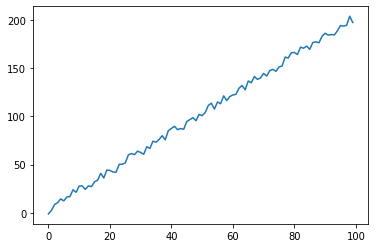

In [380]:
x = torch.tensor(range(100))
W = 2
B = 3
y = W*x + B
y = y + 10*(torch.rand(x.shape[0]) - 0.5)
plt.plot(x,y)

In [381]:
def model(x, w, b):
  return w * x + b

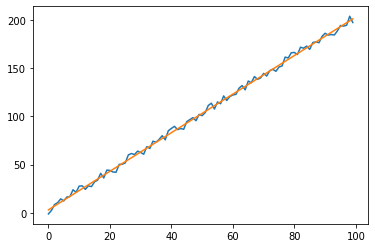

In [382]:
plt.plot(x,y)

yp = model(x, W, B)
plt.plot(x,yp)

In [383]:
def loss_fn(yp, y):
  squared_diffs = (yp - y)**2
  return squared_diffs.mean()

In [384]:
loss_fn(yp, y)

tensor(8.0265)

In [385]:
y3 = model(x, W, B + .3)
loss_fn(y3, y)

tensor(7.9776)

*   y = wx + b
*   dy/dw = x
*   dy/db = 1
*   dloss/dw = dloss/dy * dy/dw
*   dloss/db = dloss/dy * dy/db




In [386]:
def dy_dw(x, w, b):
  return x

def dy_db(x, w, b):
  return 1.0

def dloss_fn(yp, y):
  dsq_diffs = 2 * (yp - y) / yp.size(0)
  return dsq_diffs

def grad_fn(x, y, yp, w, b):
  dloss_dy = dloss_fn(yp, y)
  dloss_dw = dloss_dy * dmodel_dw(x, w, b)
  dloss_db = dloss_dy * dmodel_db(x, w, b)
  return (dloss_dw.sum(), dloss_db.sum())

In [387]:
def training_loop(n_epochs, learning_rate, wp, bp, x, y):

  loss_epochs = []
  for epoch in range(n_epochs):
      # Computes our model's predicted output
      yp = model(x, wp, bp)
      
      # How wrong is our model? That's the error! 
      loss = loss_fn(yp, y)
      loss_epochs.append(loss)

      (wp_grad, bp_grad) = grad_fn(x, y, yp, wp, bp)
    
      # Updates parameters using gradients and the learning rate
      wp = wp - learning_rate * wp_grad
      bp = bp - learning_rate * bp_grad

      if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
        print(f'Epoch {epoch+1}, Loss {loss}, wp_grad: {wp_grad}, bp_grad: {bp_grad}')
    
  return (wp, bp, loss_epochs)

In [388]:
(wp, bp, loss) = training_loop(n_epochs = 1000, 
              learning_rate = 1e-2,
              wp = 1,
              bp = 1,
              x = x,
              y = y)

Epoch 1, Loss 3507.5419921875, wp_grad: -6778.0888671875, bp_grad: -103.46330261230469
Epoch 2, Loss 14636134.0, wp_grad: 438441.40625, bp_grad: 6608.91357421875
Epoch 3, Loss 61239586816.0, wp_grad: -28360548.0, bp_grad: -427580.25
Epoch 4, Loss 256234963861504.0, wp_grad: 1834499968.0, bp_grad: 27657912.0
Epoch 5, Loss 1.0721228618475766e+18, wp_grad: -118664486912.0, bp_grad: -1789050112.0
Epoch 10, Loss 1.374913489591841e+36, wp_grad: 1.3438049035552712e+20, bp_grad: 2.025992835810984e+18
Epoch 100, Loss nan, wp_grad: nan, bp_grad: nan
Epoch 500, Loss nan, wp_grad: nan, bp_grad: nan
Epoch 1000, Loss nan, wp_grad: nan, bp_grad: nan


In [389]:
(wp, bp, loss) = training_loop(n_epochs = 10000, 
              learning_rate = 1e-4,
              wp = 1,
              bp = 1,
              x = x,
              y = y)

Epoch 1, Loss 3507.5419921875, wp_grad: -6778.0888671875, bp_grad: -103.46330261230469
Epoch 2, Loss 421.4385986328125, wp_grad: -2325.8935546875, bp_grad: -36.339534759521484
Epoch 3, Loss 58.04237365722656, wp_grad: -798.1195068359375, bp_grad: -13.305923461914062
Epoch 4, Loss 15.251437187194824, wp_grad: -273.8628234863281, bp_grad: -5.40187931060791
Epoch 5, Loss 10.212542533874512, wp_grad: -93.96290588378906, bp_grad: -2.6895480155944824
Epoch 10, Loss 9.539255142211914, wp_grad: -0.4269294738769531, bp_grad: -1.2790272235870361
Epoch 100, Loss 9.524724006652832, wp_grad: 0.019515037536621094, bp_grad: -1.2664952278137207
Epoch 500, Loss 9.461835861206055, wp_grad: 0.018097877502441406, bp_grad: -1.2410647869110107
Epoch 1000, Loss 9.386731147766113, wp_grad: 0.01899242401123047, bp_grad: -1.2099534273147583
Epoch 5000, Loss 8.905291557312012, wp_grad: 0.014902114868164062, bp_grad: -0.9876922965049744
Epoch 10000, Loss 8.522652626037598, wp_grad: 0.010914802551269531, bp_grad: 

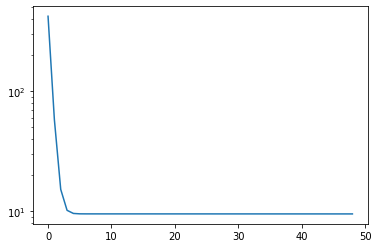

In [390]:
plt.semilogy(loss[1:50])

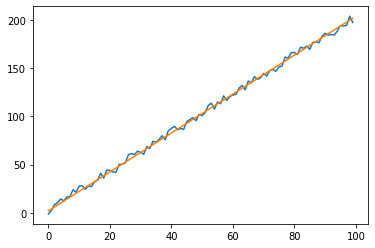

In [391]:
plt.plot(x,y)

yp = model(x, wp, bp)
plt.plot(x, yp)

In [392]:
(wp, bp, loss) = training_loop(n_epochs = 1000, 
              learning_rate = 1e-2,
              wp = 1,
              bp = 1,
              x = x*0.1,
              y = y)

Epoch 1, Loss 12267.45703125, wp_grad: -1268.8389892578125, bp_grad: -192.5633087158203
Epoch 2, Loss 1329.003173828125, wp_grad: -416.5285339355469, bp_grad: -63.09697723388672
Epoch 3, Loss 150.32176208496094, wp_grad: -136.74754333496094, bp_grad: -20.59870147705078
Epoch 4, Loss 23.312021255493164, wp_grad: -44.90619659423828, bp_grad: -6.648726463317871
Epoch 5, Loss 9.625701904296875, wp_grad: -14.758058547973633, bp_grad: -2.0700347423553467
Epoch 10, Loss 7.9714674949646, wp_grad: -0.0810164213180542, bp_grad: 0.15520942211151123
Epoch 100, Loss 7.955089092254639, wp_grad: -0.015906929969787598, bp_grad: 0.1046471893787384
Epoch 500, Loss 7.944011211395264, wp_grad: -0.0021741390228271484, bp_grad: 0.014311984181404114
Epoch 1000, Loss 7.943801403045654, wp_grad: -0.00016546249389648438, bp_grad: 0.001194596290588379


In [393]:
from sklearn.linear_model import LinearRegression
import numpy
linr = LinearRegression()
xnp = x.numpy().reshape((-1, 1))
ynp = y.numpy()
linr.fit(xnp, ynp)
print(linr.intercept_, linr.coef_[0])

yp = model(x, linr.coef_[0], linr.intercept_)
     
# How wrong is our model? That's the error! 
loss = loss_fn(yp, y)

print(loss)

3.52408166479357 1.9940923436339681
tensor(7.9438)


In [404]:
def training_loop_grad(n_epochs, learning_rate, wp, bp, x, y):

  wp = torch.tensor(wp, requires_grad=True, dtype=torch.float)
  bp = torch.tensor(bp, requires_grad=True, dtype=torch.float)

  for epoch in range(n_epochs):
      # Computes our model's predicted output
      yp = model(x, wp, bp)
      
      # How wrong is our model? That's the error! 
      loss = loss_fn(yp, y)
      loss.backward()

      # no_grad sirve para que pytorch no tenga en cuenta esta operación en el cáluclo del gradiente
      with torch.no_grad():
        wp -= learning_rate * wp.grad
        bp -= learning_rate * bp.grad

      if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
        print(f'Epoch {epoch+1}, Loss {loss}, wp_grad: {wp.grad}, bp_grad: {bp.grad}')

      wp.grad.zero_()
      bp.grad.zero_()
    
  return (wp, bp)


(wp, bp) = training_loop_grad(n_epochs = 1000, 
              learning_rate = 1e-4,
              wp = 1.0,
              bp = 1.0,
              x = x,
              y = y)

Epoch 1, Loss 3507.5419921875, wp_grad: -6778.0888671875, bp_grad: -103.46330261230469
Epoch 2, Loss 421.4385986328125, wp_grad: -2325.8935546875, bp_grad: -36.33953094482422
Epoch 3, Loss 58.04237365722656, wp_grad: -798.1195068359375, bp_grad: -13.305923461914062
Epoch 4, Loss 15.251437187194824, wp_grad: -273.86279296875, bp_grad: -5.40187931060791
Epoch 5, Loss 10.212542533874512, wp_grad: -93.96290588378906, bp_grad: -2.6895480155944824
Epoch 10, Loss 9.539255142211914, wp_grad: -0.4269294738769531, bp_grad: -1.2790272235870361
Epoch 100, Loss 9.524724006652832, wp_grad: 0.019517898559570312, bp_grad: -1.2664949893951416
Epoch 500, Loss 9.461835861206055, wp_grad: 0.018098831176757812, bp_grad: -1.2410647869110107
Epoch 1000, Loss 9.386731147766113, wp_grad: 0.018995285034179688, bp_grad: -1.2099534273147583


In [395]:
!pip install torchviz

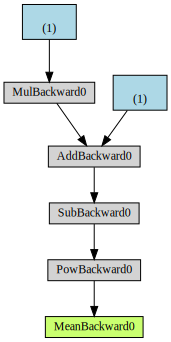

In [396]:
import torchviz

w = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

yp = x * w + b
error = yp - y
loss = (error ** 2).mean()

torchviz.make_dot(loss)

In [406]:
def training_loop_optim(n_epochs, optimizer, wp, bp, x, y):

  for epoch in range(n_epochs):
      # Computes our model's predicted output
      yp = model(x, wp, bp)
      
      # How wrong is our model? That's the error! 
      loss = loss_fn(yp, y)
      loss.backward()

      optimizer.step()

      if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
        print(f'Epoch {epoch+1}, Loss {loss}, wp_grad: {wp.grad}, bp_grad: {bp.grad}')

      optimizer.zero_grad()
    
  return (wp, bp)

learning_rate = 1e-4

wp = torch.tensor(1, requires_grad=True, dtype=torch.float)
bp = torch.tensor(1, requires_grad=True, dtype=torch.float)

optimizer = torch.optim.SGD([wp, bp], lr=learning_rate)

(wp, bp) = training_loop_optim(n_epochs = 1000, 
              optimizer = optimizer,
              wp = wp,
              bp = bp,
              x = x,
              y = y)

Epoch 1, Loss 3507.5419921875, wp_grad: -6778.0888671875, bp_grad: -103.46330261230469
Epoch 2, Loss 421.4385986328125, wp_grad: -2325.8935546875, bp_grad: -36.33953094482422
Epoch 3, Loss 58.04237365722656, wp_grad: -798.1195068359375, bp_grad: -13.305923461914062
Epoch 4, Loss 15.251437187194824, wp_grad: -273.86279296875, bp_grad: -5.40187931060791
Epoch 5, Loss 10.212542533874512, wp_grad: -93.96290588378906, bp_grad: -2.6895480155944824
Epoch 10, Loss 9.539255142211914, wp_grad: -0.4269294738769531, bp_grad: -1.2790272235870361
Epoch 100, Loss 9.524724006652832, wp_grad: 0.019517898559570312, bp_grad: -1.2664949893951416
Epoch 500, Loss 9.461835861206055, wp_grad: 0.018098831176757812, bp_grad: -1.2410647869110107
Epoch 1000, Loss 9.386731147766113, wp_grad: 0.018995285034179688, bp_grad: -1.2099534273147583


In [410]:
learning_rate = 1e-1

wp = torch.tensor(1, requires_grad=True, dtype=torch.float)
bp = torch.tensor(1, requires_grad=True, dtype=torch.float)

optimizer = torch.optim.Adam([wp, bp], lr=learning_rate)

(wp, bp) = training_loop_optim(n_epochs = 1000, 
              optimizer = optimizer,
              wp = wp,
              bp = bp,
              x = x,
              y = y)



Epoch 1, Loss 3507.5419921875, wp_grad: -6778.0888671875, bp_grad: -103.46330261230469
Epoch 2, Loss 2853.22119140625, wp_grad: -6111.48876953125, bp_grad: -93.3633041381836
Epoch 3, Loss 2268.797607421875, wp_grad: -5447.572265625, bp_grad: -83.30396270751953
Epoch 4, Loss 1755.1083984375, wp_grad: -4788.6064453125, bp_grad: -73.31962585449219
Epoch 5, Loss 1312.361083984375, wp_grad: -4137.28466796875, bp_grad: -63.451107025146484
Epoch 10, Loss 105.051025390625, wp_grad: -1125.189453125, bp_grad: -17.812959671020508
Epoch 100, Loss 8.379719734191895, wp_grad: -7.128154754638672, bp_grad: -0.7696995735168457
Epoch 500, Loss 7.95844841003418, wp_grad: 0.11868667602539062, bp_grad: -0.1201358437538147
Epoch 1000, Loss 7.943809986114502, wp_grad: 0.001903533935546875, bp_grad: -0.002255842089653015


Text(0.5, 1.0, 'Model: y = x*1.9941599369049072 + 3.519625663757324')

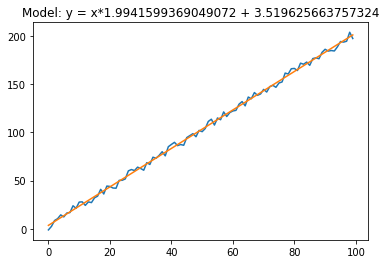

In [417]:
plt.plot(x,y)

yp = model(x, wp, bp)
plt.plot(x, yp.detach().numpy())
plt.title(f'Model: y = x*{wp} + {bp}')